In [1]:
# ignore warnings
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

import acquire
import prepare

In [2]:
# acquiring titanic data

titanic_df = (acquire.new_titanic_data()).drop(columns = 'passenger_id')


In [3]:
# preparing titanic data

train, validate, test = (prepare.prep_titanic_data(titanic_df))

for df in train, validate, test:
    df = df.drop(columns = ['sex', 'embark_town'], inplace = True)

In [4]:
# creating X_train features and y_train target

X_train = train.drop(columns=['survived'])
y_train = train.survived

X_validate = validate.drop(columns=['survived'])
y_validate = validate.survived

X_test = test.drop(columns=['survived'])
y_test = test.survived

# 1. Fit a KNN classifier to your training sample and transform 
(i.e. make predictions on the training sample)

### Creating KNN Object

In [5]:
knn = KNeighborsClassifier(n_neighbors = 5, weights = 'uniform')

### Fitting the Model to Training Data

In [6]:
knn.fit(X_train, y_train)

KNeighborsClassifier()

### Make Predictions

In [7]:
y_pred = knn.predict(X_train)
y_pred[:10]

array([0, 0, 0, 1, 1, 1, 0, 1, 1, 0])

### Estimate Probability

In [8]:
y_pred_proba = knn.predict_proba(X_train)
y_pred_proba[:5]

array([[0.8, 0.2],
       [1. , 0. ],
       [0.8, 0.2],
       [0.4, 0.6],
       [0.4, 0.6]])

# 2. Evaluate Results
- Model score
- Confusion matrix
- Classification report

### Accuracy

In [9]:
knn.score(X_train, y_train)

0.8036529680365296

In [10]:
print('Accuracy of the KNN classifier on the training set: {:.2f}'.format(knn.score(X_train, y_train)))

Accuracy of the KNN classifier on the training set: 0.80


### Confusion Matrix

In [11]:
confusion_matrix = confusion_matrix(y_train, y_pred)
print(confusion_matrix)

[[225  33]
 [ 53 127]]


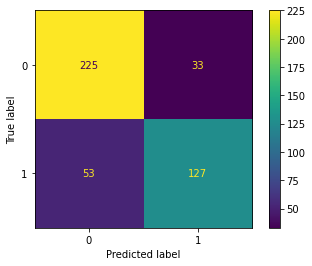

In [12]:
from sklearn.metrics import plot_confusion_matrix

plot_confusion_matrix(knn, X_train, y_train)

### Classification Report

In [13]:
print(classification_report(y_train, y_pred))

              precision    recall  f1-score   support

           0       0.81      0.87      0.84       258
           1       0.79      0.71      0.75       180

    accuracy                           0.80       438
   macro avg       0.80      0.79      0.79       438
weighted avg       0.80      0.80      0.80       438



# 3. Print and Label:
- Accuracy
- True Positive Rate
- False Positive Rate
- True Negative Rate
- False Negative Rate
- Precision 
- Recall
- f1 score
- support

In [22]:
# Positive: survive
#     TP: Predict survive correctly
#     FP: Predict survive incorrectly

# Negative: does not survive
#     TN: Predict does not survive correctly
#     FN: Predict does not survive incorrectly

TP = 127
FP = 33
TN = 225
FN = 53

total = TP + FP + TN + FN

In [28]:
# accuracy
print('Accuracy: {:.2f}'.format((TP + TN) / total))

# true positive rate
# print('True Positive Rate: {:.2f}'.format()

# false positive rate
# print('False Positive Rate: {:.2f}'.format()

# true negative rate
# print('True Negative Rate: {:.2f}'.format()

# false negative rate
# print('False Negative Rate: {:.2f}'.format()

Accuracy: 0.80


In [29]:
# precision
# print('Precision: {:.2f}'.format()

# recall
# print('Recall: {:.2f}'.format()

# f-1 score
# print('F-1 Score: {:.2f}'.format()

# support
# print('Support: {:.2f}'.format()

In [30]:
def evaluate(k):
    '''
    This function takes in a value for k and:
        1. creates the KNN object
        2. gits the model to the training data
        3. makes predictions
        4. estimates the probability
        5. computes the accuracy
        6. displays a confusion matrix
        7. prints a classification report
        8. prints:
            - TP
            - FP
            - TN
            - FN
        9. prints: 
            - accuracy
            - precision
            - recall
            - f-1 score
            - support
    '''
   knn = KNeighborsClassifier(n_neighbors = k, weights = 'uniform') 